### Supervised Machine Learning Task

In this task we'll train our model using well labeled data i.e. each data for independent feature(Hours) is tagged with the corresponding correct answer(data) for target/dependent variable(Scores). Then we'll train the data so that our supervised algorithm analyses the data and produce more accurate result for new/unseen data.

In **Simple Linear Regression**, we'll predict outcome on one target/dependent variable(Scores) from the data on another independent variable(Hours).

#### Name : Mrinal Anand

In [94]:
# Importing required libraries
import pandas as pd
import numpy as np

In [95]:
# Loading data from the url passed
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


From the below 2D plot we can clearly see that there is a linear relation between Hours studied and Percentage score. 

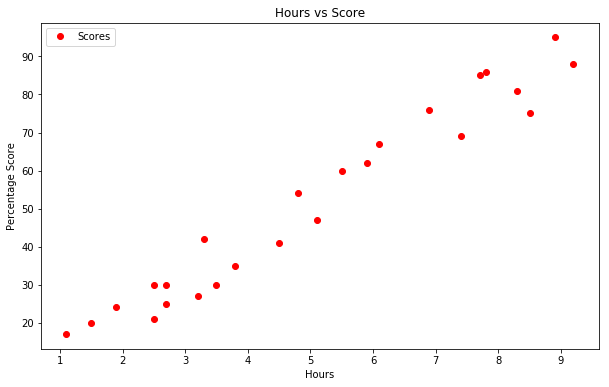

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

# df.plot() takes the feature and label(column names) as x and y, not the data itself, so x = df['Hours'] and y = ...   won't work
data.plot(x = 'Hours', y = 'Scores', style = 'ro', figsize = (10,6))

plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Percentage Score')

plt.show()

In [97]:
data.shape 

(25, 2)

### Storing independent varible as training data (X) and dependent varible as target (y)



In [80]:
# data['Hours'] returns Series(1D array) ie; (25,) then reshape it to 2D array
X_df = data.iloc[:, :1]
y_df = data.iloc[:, 1:] # [:, 1:] creates an array; whereas [:,1] would create a Series

X_df.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


Dataframe.values -  returns a numpy representation of the dataframe i.e. only the values in the dataframe will be returned, the axes labels will be removed

In [81]:
X = X_df.values
y = y_df.values

print(X.shape)
print(y.shape)

(25, 1)
(25, 1)


### Splitting our dataset 

We'll split our dataset into a general 80-20 ratio i.e. 80% as training data and 20% as test data.

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2, # split 20 % as test data
                                                   random_state = 0 # split will always be the same
                                                   )
# Same split means everytime we run the cell X_tain,.....y_test would contain same data but shuffled 

### Taining our algorithm

In [83]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # regressor is LinearRegression object
regressor.fit(X_train, y_train)

# Training completed

In [101]:
# Finding slope and intercept term using sklearn's inbuilt attributes

print(regressor.coef_[0][0]) # shape = (1,1)
print(regressor.intercept_[0]) # shape = (1,)

9.910656480642237
2.018160041434683


### Line of Best Fit

Linear Regression consists of finding the best-fitting line through the points. This best-fitting line is called **Regression line**.

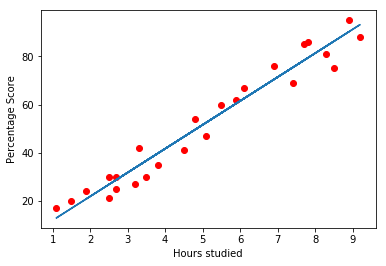

In [100]:
y_predicted = regressor.coef_ * X_train + regressor.intercept_

plt.scatter(X, y, color = 'r')
plt.plot(X_train, y_predicted)

#plt.title('')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')

plt.show()

#### The blue diagonal line in the above figure is the regression line and consists of predicted score on y for each possible value of X. The red circles are the actual data

The equation for the line is :<br>
y_predicted = slope * X + intercept

So for first input data **X = 2.5** , <br>
y_predicted = (9.910656480642237) * 2.5 + (2.018160041434683) = 26.79480164143

#### Let's verify above result and look at few more predictions along the regression line

In [109]:
y_line = regressor.predict(X)
line = pd.DataFrame({'Hours' : X.flatten(),
                    'y' : y.flatten(),
                     'y predicted' : y_line.flatten()})
line.head()

,Hours,y,y predicted
0,2.5,21,26.794801
1,5.1,47,52.562508
2,3.2,27,33.732261
3,8.5,75,86.258740
4,3.5,30,36.705458


### Making Predictions

In [86]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [87]:
df = pd.DataFrame({'Actual' : y_test.flatten(),
                   'Predicted' : y_pred.flatten()})
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Predicting score on new/unseen data

In [110]:
hours = 9.25
new_pred = regressor.predict(hours)
print('Hours Studied = {}'.format(hours))
print('Predicted Score = {}'.format(new_pred[0][0])) # As our y is ndarray and not Series

Hours Studied = 9.25
Predicted Score = 93.69173248737538


### Evaluating the model

Let's evaluate the performance of algorithm. This step is important to compare how well different algorithms perform on a given dataset.

In [116]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


In [117]:
from math import sqrt
print('Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.6474476121003665
